In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import plotly.express as px
import seaborn.objects as so
import matplotlib.pyplot as plt

sns.set_theme(style="darkgrid")
tips = sns.load_dataset("tips")
dots = sns.load_dataset("dots")
fmri = sns.load_dataset("fmri")
titanic = sns.load_dataset("titanic")
flights = sns.load_dataset("flights")
dowjones = sns.load_dataset("dowjones")
anagrams = sns.load_dataset("anagrams")
penguins = sns.load_dataset("penguins")
diamonds = sns.load_dataset("diamonds")
healthexp = sns.load_dataset("healthexp")
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
healthexp = sns.load_dataset("healthexp").sort_values("Year")
flights_wide = flights.pivot(index="year", columns="month", values="passengers")

# Visualizing categorical data

- relational 플롯 튜토리얼에서는 데이터 집합의 여러 변수 간의 관계를 나타내는 다른 시각적 표현 방법을 사용하는 방법을 살펴 보았습니다. 
- 예제에서는 주로 두 개의 수치 변수 간의 주요 관계에 초점을 맞추었습니다. 
- 그러나 주요 변수 중 하나가 "범주형" (이산 그룹으로 분할 된)인 경우 시각화를 위해 더 특화된 접근 방법을 사용하는 것이 도움이 될 수 있습니다.

- Seaborn에서 범주형 데이터를 포함한 관계를 시각화하는 다양한 방법이 있습니다. 
- relplot()과 scatterplot() 또는 lineplot()의 관계와 유사하게, 이러한 플롯을 만드는 두 가지 방법이 있습니다. 
- 다양한 방법으로 범주형 데이터를 시각화하는 축 수준 함수와 이러한 함수에 통합된 고수준 인터페이스인 catplot()이 있습니다.

- 다른 카테고리 플롯 종류를 세 가지 그룹으로 생각하는 것이 도움이 됩니다. 
- 이에 대해 자세히 설명하겠습니다. 이들은 다음과 같습니다.

- Categorical scatterplots:

    - stripplot() (with kind="strip"; the default)

    - swarmplot() (with kind="swarm")

- Categorical distribution plots:

    - boxplot() (with kind="box")

    - violinplot() (with kind="violin")

    - boxenplot() (with kind="boxen")

- Categorical estimate plots:

    - pointplot() (with kind="point")

    - barplot() (with kind="bar")

    - countplot() (with kind="count")

- 이러한 그룹들은 데이터를 서로 다른 세부 수준으로 나타냅니다. 
- 사용할 플롯을 결정할 때, 답변하려는 질문을 생각해야 합니다. 
- 통합 API를 사용하면 다양한 종류의 플롯에서 데이터를 쉽게 전환하고 여러 관점에서 데이터를 볼 수 있습니다.

- 이 튜토리얼에서는 주로 고수준 인터페이스인 catplot()에 초점을 맞춥니다. 
- 이 함수는 위의 각 함수의 고수준 인터페이스이므로 각 플롯별 더 상세한 API 문서를 참조하면서 각 종류의 플롯을 보여줄 때 이들을 참조할 것입니다.

# Categorical scatterplots

- catplot()의 기본 데이터 표시 방법은 산점도입니다. 
- seaborn에는 실제로 두 가지 다른 범주형 산점도가 있습니다. 
- 범주형 데이터를 산점도로 표시하는 주요 도전 과제는 하나의 범주형 변수 축에 속하는 모든 점이 동일한 위치에 놓이게 된다는 것입니다. 
- stripplot()이 사용하는 방식은 범주형 축의 점의 위치를 작은 양의 무작위 "jitter"로 조정하는 것입니다. 이것은 catplot()의 기본 "kind"입니다.

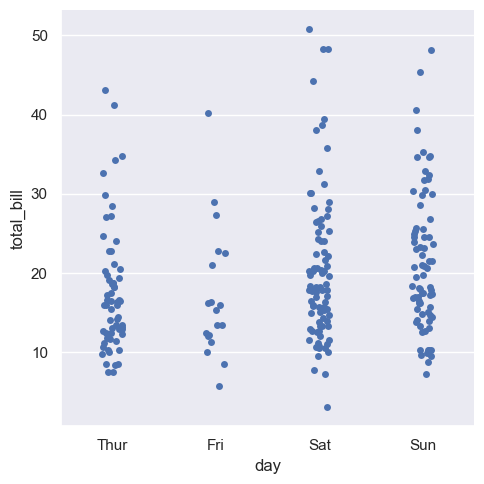

In [2]:
sns.catplot(data=tips, x="day", y="total_bill");

- jitter 매개 변수는 jitter의 크기를 제어하거나 완전히 사용하지 않도록 설정할 수 있습니다. 

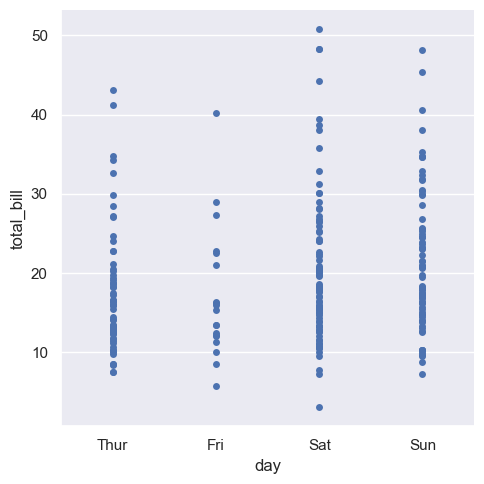

In [4]:
sns.catplot(data=tips, x="day", y="total_bill", jitter=False);

- 두 번째 방법은 범주 축을 따라 점을 중첩되지 않도록 조정하는 알고리즘을 사용합니다. 
- 이것은 관측치의 분포를 더 잘 나타내기 때문에 유용합니다. 하지만 비교적 작은 데이터셋에 대해서만 잘 작동합니다. 
- 이러한 종류의 그림은 "beeswarm"이라고도 하며, catplot()에서 kind="swarm"으로 설정하여 그릴 수 있습니다.

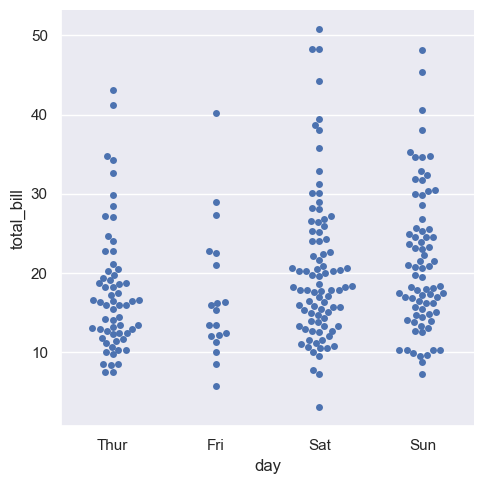

In [5]:
sns.catplot(data=tips, x="day", y="total_bill", kind="swarm");

- 관계형 플롯과 유사하게 범주형 플롯에도 hue 시맨틱을 사용하여 다른 차원을 추가할 수 있습니다. 
- 그러나 범주형 플롯은 현재 크기 또는 스타일 시맨틱을 지원하지 않습니다. 산점도에 대해서는 점의 색상만 변경하면 됩니다.

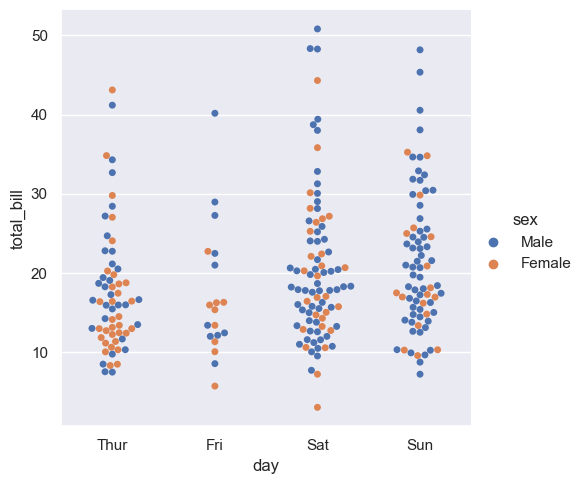

In [6]:
sns.catplot(data=tips, x="day", y="total_bill", hue="sex", kind="swarm");

- 숫자 데이터와 마찬가지로 범주형 변수의 레벨을 축에 나열하는 방법이 항상 명확하지는 않습니다. 
- seaborn 범주형 플로팅 함수들은 일반적으로 데이터에서 범주의 순서를 추론하려고 합니다. 
- 데이터가 pandas Categorical 데이터 타입을 가지는 경우, 범주의 기본 순서는 거기에서 설정할 수 있습니다. 
- 범주 축에 전달된 변수가 숫자처럼 보이는 경우 레벨은 정렬됩니다. 
- 그러나 숫자가 레이블로 사용될 때에도 데이터는 범주형으로 처리되며 범주 축의 서수적 위치 (구체적으로 0, 1, ...)에서 그려집니다.

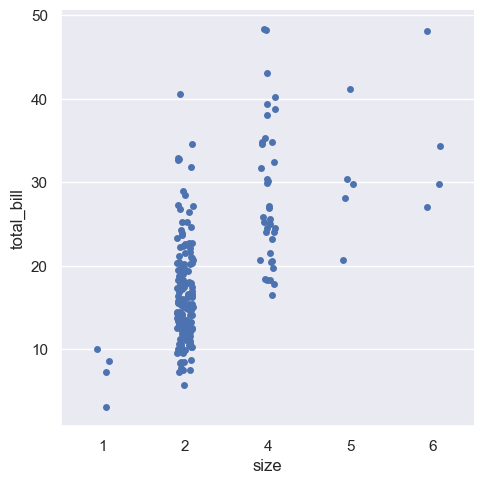

In [7]:
sns.catplot(data=tips.query("size != 3"), x="size", y="total_bill");

- 기본 순서를 선택하는 다른 옵션은 데이터 집합에 표시된 대로 카테고리의 수준을 사용하는 것입니다. 
- 순서 매개변수를 사용하여 플롯별로 순서를 제어할 수도 있습니다. 
- 이는 동일한 그림에 여러 범주형 플롯을 그릴 때 중요할 수 있으며, 이에 대한 자세한 내용은 아래에서 살펴보겠습니다:

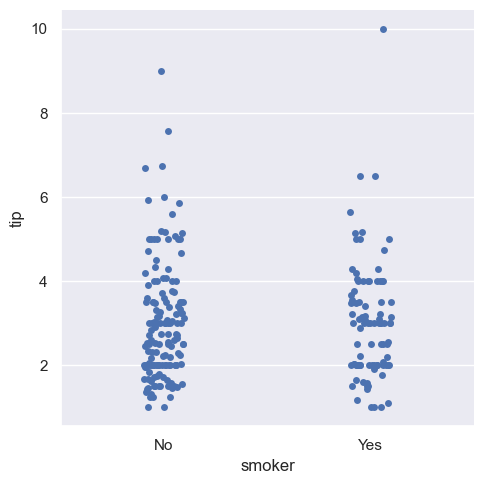

In [8]:
sns.catplot(data=tips, x="smoker", y="tip", order=["No", "Yes"]);

- '범주형 축'이라는 개념을 언급했습니다. 이 예에서는 항상 가로 축에 해당합니다. 
- 그러나 범주형 변수를 세로축에 배치하는 것이 도움이 되는 경우가 많습니다(특히 범주 이름이 비교적 길거나 카테고리가 많은 경우). 
- 이렇게 하려면 변수를 축에 할당하는 방식을 바꾸면 됩니다:

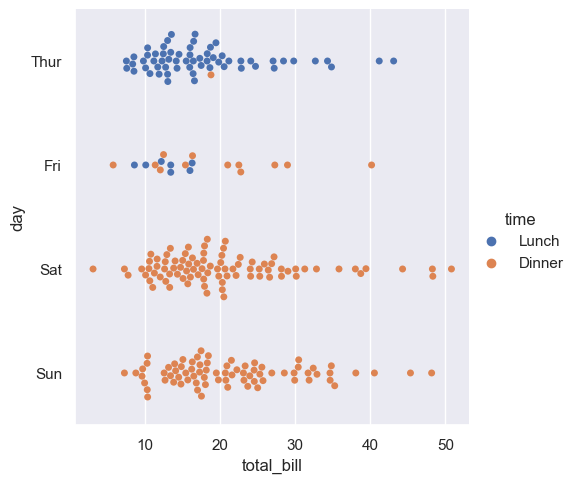

In [9]:
sns.catplot(data=tips, x="total_bill", y="day", hue="time", kind="swarm");

# Comparing distributions

- 데이터셋의 크기가 커지면 범주형 산점도는 각 범주 내 값의 분포에 대한 정보를 제공하는 데 제한이 있습니다. 
- 이 때, 범주 수준 간 쉬운 비교를 용이하게 하는 방식으로 분포 정보를 요약하는 몇 가지 접근 방법이 있습니다.

## Boxplots

- 첫 번째로 익숙한 boxplot()이 있습니다. 이러한 그림은 분포의 세 분위값과 극단값을 보여줍니다. 
- "whiskers"는 하위 분위수와 상위 분위수에서 1.5 IQR 내에 있는 지점까지 연장되고 이 범위를 벗어나는 관측치는 독립적으로 표시됩니다. 
- 이는 박스플롯의 각 값이 데이터에서 실제 관측치에 해당하는 것을 의미합니다.

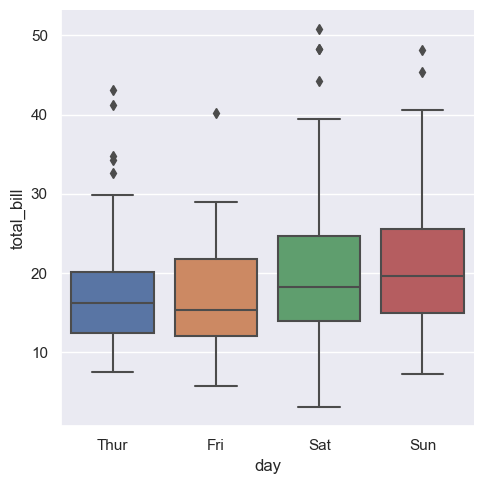

In [2]:
sns.catplot(data=tips, x="day", y="total_bill", kind="box");

- hue 시맨틱을 추가할 때는 시맨틱 변수의 각 수준의 상자를 범주형 축을 따라 이동하여 서로 겹치지 않도록 합니다.

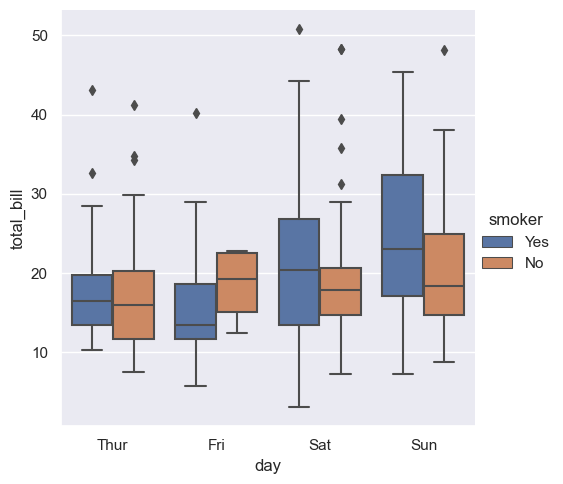

In [3]:
sns.catplot(data=tips, x="day", y="total_bill", hue="smoker", kind="box");

- 이 동작은 "dodging"라고 불리며, 시맨틱 변수가 주요 범주형 변수 내에 중첩되어 있다고 가정하기 때문에 기본적으로 켜져 있습니다. 
- 그렇지 않은 경우에는 dodging를 비활성화할 수 있습니다.

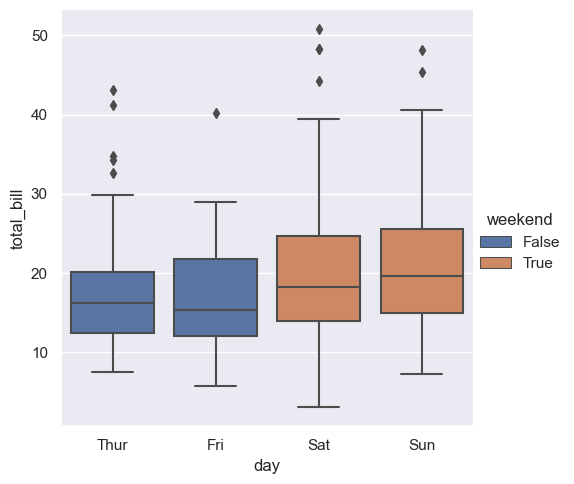

In [4]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="weekend",
    kind="box", dodge=False,
);

- 관련된 함수인 boxenplot()은 상자 그림과 비슷하지만 분포 모양에 대한 더 많은 정보를 보여주도록 최적화된 그림입니다. 큰 데이터셋에 가장 적합합니다.

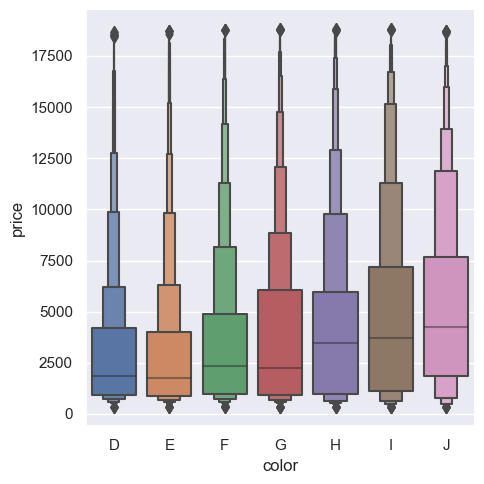

In [6]:
sns.catplot(
    data=diamonds.sort_values("color"),
    x="color", y="price", kind="boxen",
);

## Violinplots

- 다른 접근 방식은 바이올린플롯(violinplot())입니다. 이 방법은 분포 튜토리얼에서 설명한 커널 밀도 추정 절차와 상자 그림을 결합합니다.

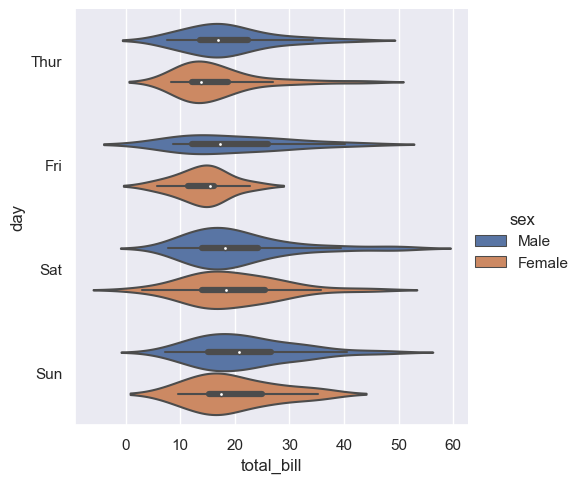

In [7]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex", kind="violin",
);

- 이 방법은 커널 밀도 추정을 사용하여 값을 더 풍부하게 설명합니다. 
- 추가적으로, 상자 그림의 분위수 및 Whisker 값은 바이올린 내부에 표시됩니다. 
- 단점은 바이올린플롯이 KDE를 사용하기 때문에 몇 가지 다른 매개변수가 조정되어야 하며, 간단한 boxplot과 비교하여 약간의 복잡성이 추가된다는 것입니다.

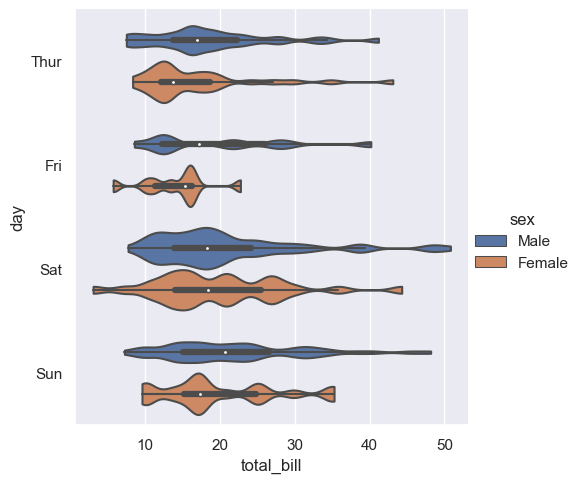

In [8]:
sns.catplot(
    data=tips, x="total_bill", y="day", hue="sex",
    kind="violin", bw=.15, cut=0,
);

- hue 매개변수의 레벨이 두 개만 있는 경우 바이올린을 "분할"하는 것이 가능하며, 더 효율적인 공간 활용이 가능합니다.

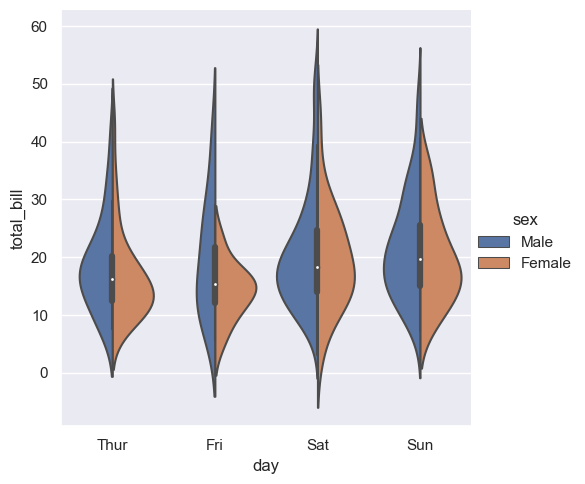

In [9]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", split=True,
);

- 마지막으로, 바이올린 플롯 내부에 그려지는 플롯을 보여주는 다양한 옵션이 있습니다. 
- 이는 개별 관측치의 요약 상자 그림 값 대신 각 관측치를 보여주는 방식을 포함합니다.

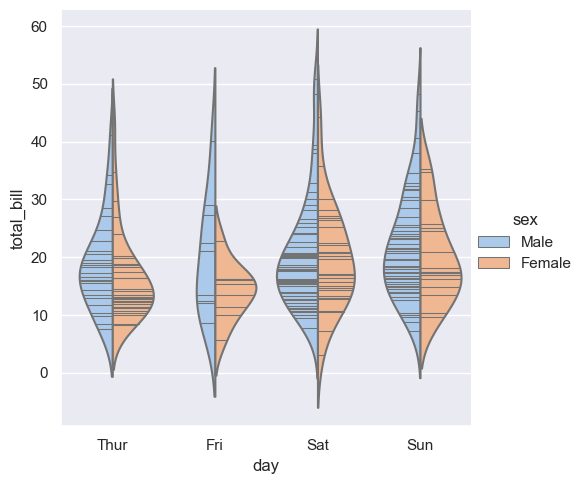

In [10]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="sex",
    kind="violin", inner="stick", split=True, palette="pastel",
);

- 또한 swarmplot() 또는 stripplot()을 상자 그림 또는 바이올린 플롯과 결합하여 분포의 요약과 함께 각 관측치를 보여줄 수 있습니다.

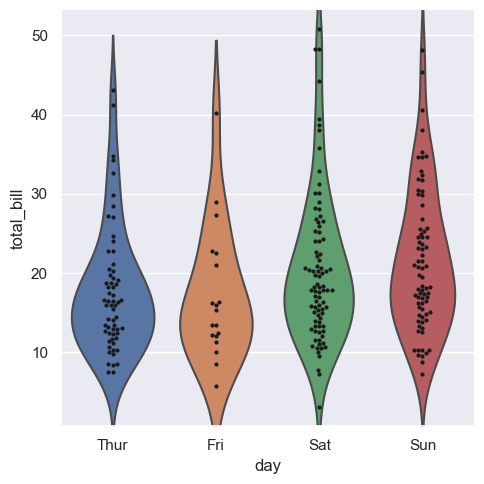

In [11]:
g = sns.catplot(data=tips, x="day", y="total_bill", kind="violin", inner=None)
sns.swarmplot(data=tips, x="day", y="total_bill", color="k", size=3, ax=g.ax);

# Estimating central tendency

- 각 범주 내 분포를 보여주는 대신 값들의 중심 경향성 추정치를 보여주는 것이 더 적절한 경우가 있습니다. 
- Seaborn에는 이 정보를 보여주는 두 가지 주요한 방법이 있습니다. 
- 중요한 점은 이러한 함수들의 기본 API가 위에서 논의한 함수들과 완전히 동일하다는 것입니다.

## Bar plots

- 이 목표를 달성하는 익숙한 스타일의 플롯은 막대 그래프입니다. 
- Seaborn에서는 barplot() 함수가 전체 데이터 집합에 적용되어 추정치를 얻기 위한 함수를 적용합니다(기본적으로 평균을 취합니다). 
- 각 범주에 여러 개의 관측치가 있는 경우 부트스트래핑을 사용하여 추정치 주변의 신뢰 구간을 계산하고 오차 막대로 표시합니다.

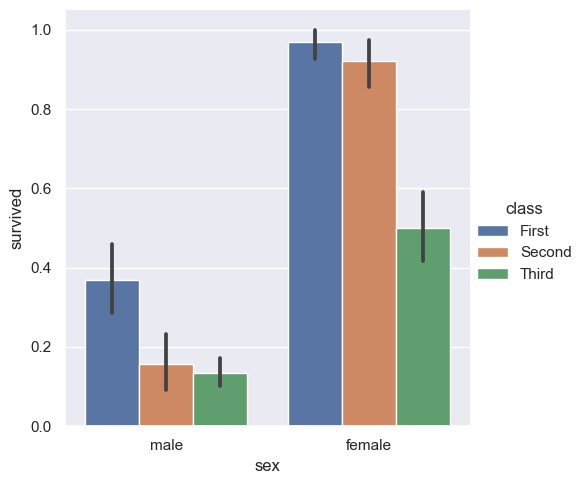

In [4]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar");

- 기본 오차 막대는 95% 신뢰 구간을 보여줍니다. 그러나 (v0.12부터) errorbar=("pi", 95) 이런 식으로 다른 표현 방법을 선택할 수 있습니다.

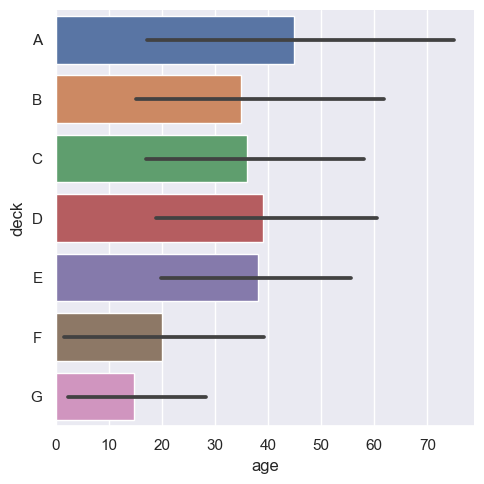

In [13]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 90), kind="bar");

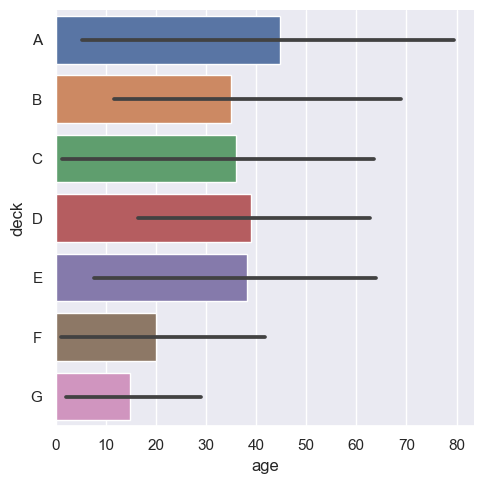

In [14]:
sns.catplot(data=titanic, x="age", y="deck", errorbar=("pi", 99), kind="bar");

- 막대 그래프의 특수한 경우는 두 번째 변수의 통계량을 계산하는 대신 각 범주의 관측치 수를 보여주려는 경우입니다. 
- 이는 양적이 아닌 범주형 변수의 히스토그램과 유사합니다. Seaborn에서는 countplot() 함수를 사용하여 쉽게 수행할 수 있습니다.

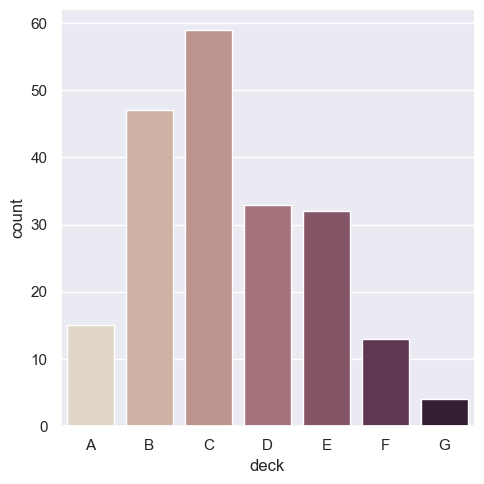

In [6]:
sns.catplot(data=titanic, x="deck", kind="count", palette="ch:.25");

- barplot() 및 countplot() 함수는 위에서 논의한 모든 옵션과 함께 각 함수에 대한 자세한 설명서에서 보여지는 다른 옵션도 사용할 수 있습니다.

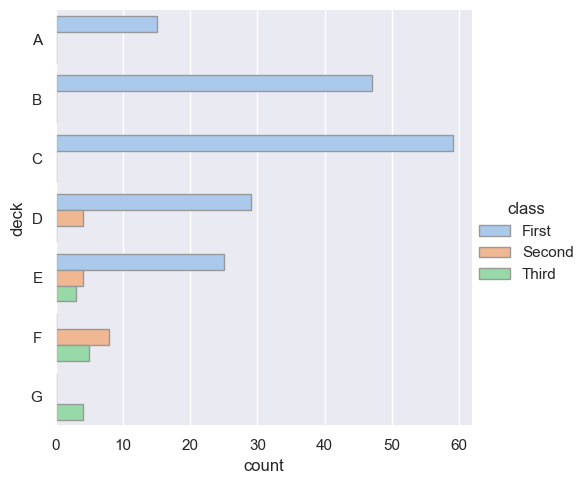

In [7]:
sns.catplot(
    data=titanic, y="deck", hue="class", kind="count",
    palette="pastel", edgecolor=".6",
);

## Point plots

- 동일한 정보를 시각화하는 대안 스타일은 pointplot() 함수에서 제공됩니다. 
- 이 함수도 높이를 이용하여 추정치의 값으로 인코딩하지만 전체 막대 대신 점 추정치와 신뢰 구간을 표시합니다. 
- 또한 pointplot()은 동일한 hue 범주의 점을 연결합니다. 이는 hue 시맨틱의 함수로서의 주요 관계가 어떻게 변하는지 쉽게 파악할 수 있도록 합니다.

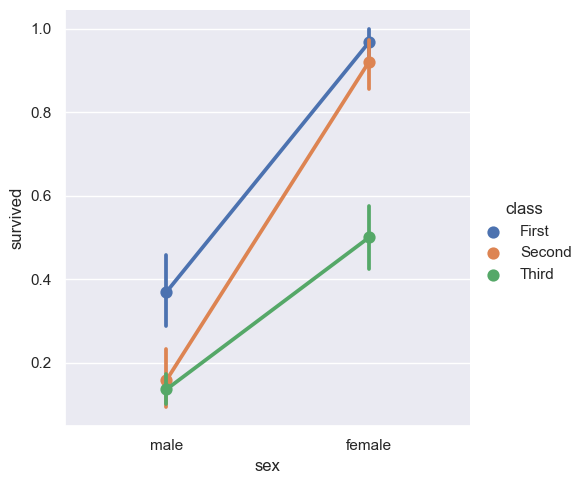

In [8]:
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="point");

- 범주형 함수는 관계형 함수의 스타일 시맨틱이 없지만, 여전히 hue와 함께 마커와/또는 linestyle을 다양하게 사용하여 접근성이 높고 흑백으로 잘 재현되는 그림을 만드는 것이 좋습니다.

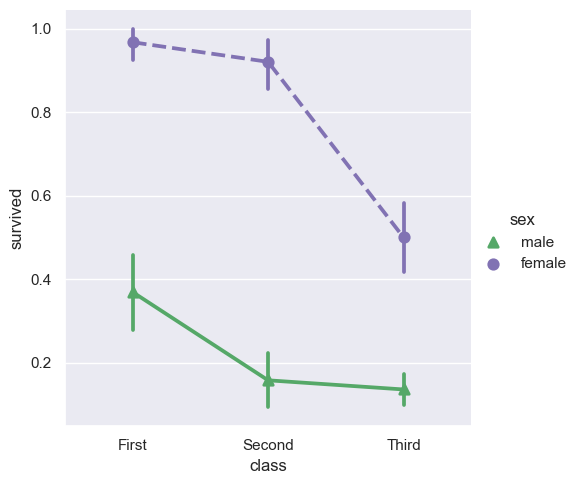

In [15]:
sns.catplot(
    data=titanic, x="class", y="survived", hue="sex",
    palette={"male": "g", "female": "m"},
    markers=["^", "o"], linestyles=["-", "--"],
    kind="point"
);

# palette : 색 
# markers : point 모양
# linestyles : 선 패턴
# kind : 그래프 종류

# Showing additional dimensions

- relplot()과 마찬가지로 catplot()도 FacetGrid에 기반하여 구축되어 있으므로 고차원 관계를 시각화하기 위해 faceting 변수를 추가하기 쉽습니다.

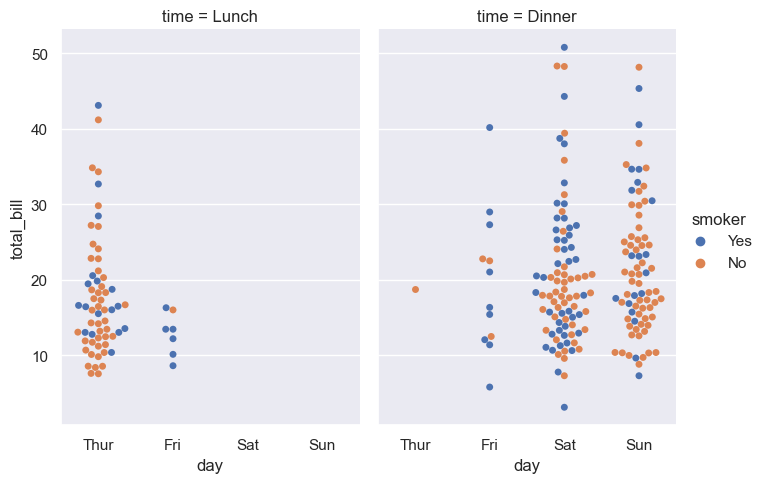

In [10]:
sns.catplot(
    data=tips, x="day", y="total_bill", hue="smoker",
    kind="swarm", col="time", aspect=.7,
);

- 더 많은 사용자 정의를 위해 반환되는 FacetGrid 객체의 메서드를 사용할 수 있습니다.

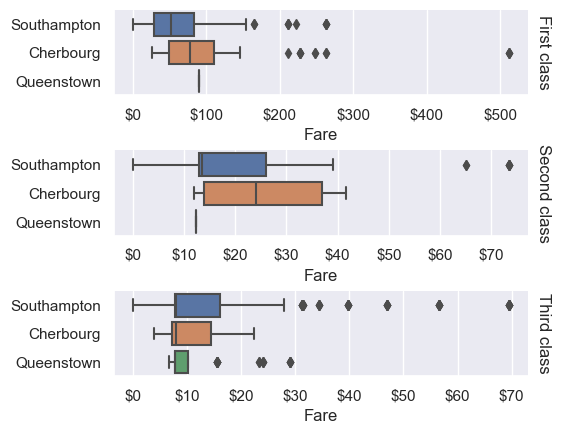

In [11]:
g = sns.catplot(
    data=titanic,
    x="fare", y="embark_town", row="class",
    kind="box", orient="h",
    sharex=False, margin_titles=True,
    height=1.5, aspect=4,
)
g.set(xlabel="Fare", ylabel="")
g.set_titles(row_template="{row_name} class")
for ax in g.axes.flat:
    ax.xaxis.set_major_formatter('${x:.0f}');